<a href="https://colab.research.google.com/github/TheZnat/Databases-and-knowledge/blob/main/lr5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа №5: Тензоры и методы тензорной факторизации
Это упражнение представляет собой введение в скрытые представления и тензоры. Сначала мы разберемся со скрытым представлением с помощью SVD. Позже распространим эту идею на тензоры.


## Задание 1-a
# Скрытое представление с использованием SVD
Предположим, нам нужно разработать систему рекомендаций фильмов. Нам предоставлены некоторые данные о зрителях и фильме, который они смотрели в прошлом. Теперь, используя эту информацию, нам нужно разработать модель обучения, которая сможет рекомендовать новые фильмы в зависимости от структуры данных.

Данные структурированы в виде матрицы, где строки представляют зрителей, а столбцы — фильмы. Запись равна 1, если зритель видел фильм. Отсутствующие значения — это то, что мы хотим предсказать.

В этой части мы изучим следующее:

(a) SVD как матричная факторизация.

(b) Сингулярные векторы как скрытое представление.

(c) Как найти отсечение скрытого представления, используя график колена.

(b) Как прогнозировать пропущенные значения и использовать их в качестве рекомендации.

$$
Data = \left( \begin{array}{ccccccccccc}
                       & Movie-1 & Movie-2 & Movie-3 & Movie-4 & Movie-5 & Movie-6 & Movie-7 & Movie-8 & Movie-9 & Movie-10  \\
                Viewer-1 & \_  & \_ & 1 & 1 & 1 & \_ & \_ & \_ & \_ & \_\\
                Viewer-2 & 1  & \_ &  1 & 1 & \_ & 1 & \_ & \_ & 1 & \_\\  
                Viewer-3 & \_ &  \_ &  \_ & \_ & \_ & \_ & 1 & 1  & \_ & 1\\
                Viewer-4 & 1  & 1 & 1 & \_ & 1 & \_ & \_ & \_ & \_ & \_\\
                Viewer-5 & 1  & 1 & 1 & 1 & 1 & \_ & \_ & \_ & \_  & \_\\                
                Viewer-6 & \_ & \_ & 1 & 1 & 1 & \_ & \_ & \_ & 1 & \_ \\
                Viewer-7 & 1  & 1  & 1 & 1 & \_ & \_ & \_ & \_ & \_ & \_ \\
                Viewer-8 & \_  & \_ & \_ & 1 & \_ & 1 & \_ & 1 & 1 & 1\\  
                \end{array}
\right)
$$


In [1]:
import numpy as np
from scipy.linalg import svd,diagsvd
import matplotlib.pyplot as plt
# генерация данных
X = np.array([[0,0,1,1,1,0,0,0,0,0],
             [1,0,1,1,0,1,0,0,1,0],
             [0,0,0,0,0,0,1,1,0,1],
             [1,1,1,0,1,0,0,0,0,0],
             [1,1,1,1,1,0,0,0,0,0],
             [0,0,1,1,1,0,0,0,1,0],
             [1,1,1,1,0,0,0,0,0,0],
             [0,0,0,1,0,1,0,1,1,1]])

(8, 8)
(10, 10)
(8,)


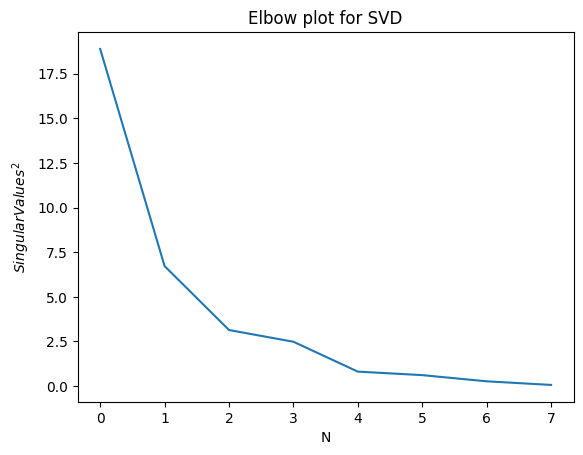

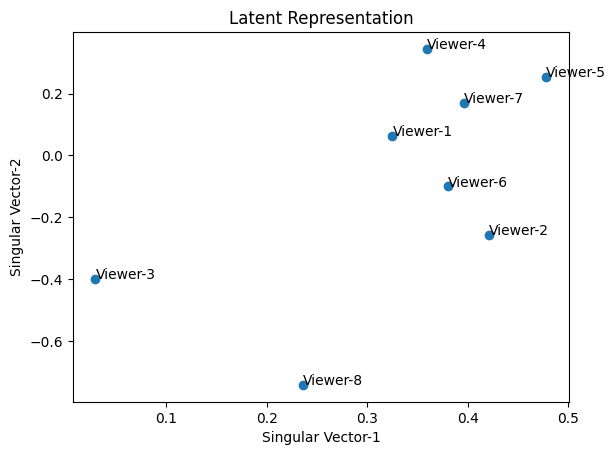

X=
.[[0 0 1 1 1 0 0 0 0 0]
 [1 0 1 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 1 0 1]
 [1 1 1 0 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 1 0]
 [1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1]]
U=
.[[ 0.3  0.1 -0.2 -0.5  0.3 -0.1 -0.6 -0.3]]
V=
.[[ 0.4]
 [ 0.2]
 [ 0.2]
 [ 0.5]
 [-0.2]
 [-0.1]
 [-0.1]
 [ 0.4]
 [ 0.5]
 [ 0.1]]
Score=
.[[ 0.04617607  0.13424659  0.90155657  0.80904016  1.08909287 -0.10131373
   0.00178218 -0.01146103  0.33989904 -0.01146103]
 [ 0.85755057  0.24667006  0.833104    1.18902275 -0.02676863  0.91670222
  -0.25609555  0.04972616  0.98032617  0.04972616]
 [-0.07490512  0.18119043 -0.163318    0.04154119  0.10063693  0.06511688
   0.73284046  1.05405289 -0.02507818  1.05405289]
 [ 0.92169354  0.97179058  0.97125888  0.45296099  0.74685223 -0.20282477
   0.11635324 -0.0363745  -0.23253264 -0.0363745 ]
 [ 0.98194855  0.93417357  1.22986704  0.83167816  0.91856706 -0.01869716
   0.07269657  0.00622443  0.07478216  0.00622443]
 [-0.01053514 -0.07415909  0.97446354  1.1163

In [2]:
# Вычисление SVD
U, s, Vh = svd(X)
print(np.shape(U))
print(np.shape(Vh))
print(np.shape(s))
#Elbow PLot: Чтобы определить значимые сингулярные значения
plt.plot(s**2)
plt.xlabel('N')
plt.ylabel('$Singular Values^2$')
plt.title('Elbow plot for SVD')
plt.show()
plt.scatter(U[:,0],U[:,1])
for i,name in enumerate(['Viewer-1','Viewer-2','Viewer-3','Viewer-4','Viewer-5','Viewer-6','Viewer-7','Viewer-8']):
    plt.annotate(name,(U[i,0],U[i,1]))
plt.xlabel('Singular Vector-1')
plt.ylabel('Singular Vector-2')
plt.title('Latent Representation')
plt.show()
# усечь только несколько первых сингулярных значений
s[4:]=0
# вычислить оценку, используя усеченное S
out_score = np.dot(np.dot(U,diagsvd(s,8,10)),Vh)
#show results
print("X=\n.{}".format(X))
print("U=\n.{}".format((U[:1,:].round(1))))
print("V=\n.{}".format(Vh[:,:1].round(1)))
print("Score=\n.{}".format(out_score))
print("Reconstructed-X=\n.{}".format(np.round(out_score)))

## Задание 1-b
В предыдущей части мы использовали двоичную матрицу для моделирования рекомендаций по просмотру фильмов. Теперь предположим, что нам даны новые данные, где каждая запись представляет собой оценку по шкале от 1 до 10. Используйте SVD, чтобы изучить скрытое представление, и порекомендуйте 3 фильма зрителю 8.

Данные:

$$
Data = \left( \begin{array}{ccccccccccc}
                       & Movie-1 & Movie-2 & Movie-3 & Movie-4 & Movie-5 & Movie-6 & Movie-7 & Movie-8 & Movie-9 & Movie-10  \\
                Viewer-1 & \_  & \_ & 5 & 4 & 6 & \_ & \_ & \_ & \_ & \_\\
                Viewer-2 & 8  & \_ &  2 & 3 & \_ & 6 & \_ & \_ & 7 & \_\\  
                Viewer-3 & \_ &  \_ &  \_ & \_ & \_ & \_ & 4 & 8  & \_ & 1\\
                Viewer-4 & 2  & 5 & 9 & \_ & 9 & \_ & \_ & \_ & \_ & \_\\
                Viewer-5 & 3  & 3 & 3 & 7 & 8 & \_ & \_ & \_ & \_  & \_\\                
                Viewer-6 & \_ & \_ & 4 & 3 & 8 & \_ & \_ & \_ & 6 & \_ \\
                Viewer-7 & 2  & 5  & 7 & 6 & \_ & \_ & \_ & \_ & \_ & \_ \\
                Viewer-8 & \_  & \_ & \_ & 5 & \_ & 1 & \_ & 8 & 3 & 7\\  
                \end{array}
\right)
$$


In [3]:
# Генерация данных
X = np.array([[0,0,5,4,6,0,0,0,0,0],
             [8,0,2,3,0,6,0,0,7,0],
             [0,0,0,0,0,0,4,8,0,1],
             [2,5,9,0,9,0,0,0,0,0],
             [2,3,3,7,8,0,0,0,0,0],
             [0,0,4,3,8,0,0,0,6,0],
             [2,5,7,6,0,0,0,0,0,0],
             [0,0,0,5,0,1,0,8,3,7]])

(8, 8)
(10, 10)
(8,)


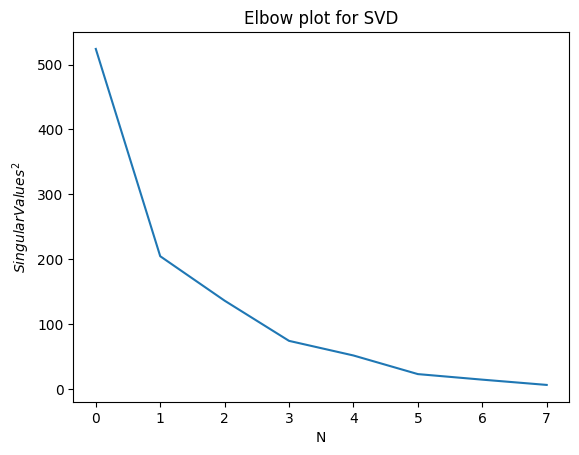

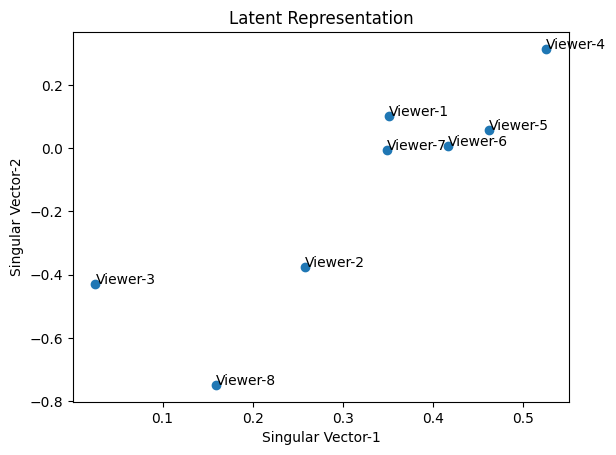

X=
.[[0 0 5 4 6 0 0 0 0 0]
 [8 0 2 3 0 6 0 0 7 0]
 [0 0 0 0 0 0 4 8 0 1]
 [2 5 9 0 9 0 0 0 0 0]
 [2 3 3 7 8 0 0 0 0 0]
 [0 0 4 3 8 0 0 0 6 0]
 [2 5 7 6 0 0 0 0 0 0]
 [0 0 0 5 0 1 0 8 3 7]]
U=
.[[ 0.4  0.1 -0.1 -0.1  0.2 -0.1  0.2 -0.9]]
V=
.[[ 0.2]
 [-0.2]
 [ 0.5]
 [ 0.2]
 [-0.2]
 [-0.3]
 [-0.4]
 [-0. ]
 [ 0.4]
 [ 0.4]]
Score=
.[[ 3.85816086e-01  1.95040429e+00  4.45733171e+00  2.69430111e+00
   6.17426852e+00 -3.84821606e-01  8.60601997e-02  3.44225476e-01
   7.77355083e-01  1.72106992e-01]
 [ 7.24784948e+00 -4.73432354e-02  1.76649725e+00  3.97606268e+00
  -2.53347602e-01  5.52109105e+00 -6.11274979e-01 -6.29237848e-01
   7.48835158e+00  3.66329352e-01]
 [-1.30317391e+00 -2.60469846e-01 -7.18314769e-01  1.96223127e+00
  -1.64533275e-01 -4.76096094e-01  1.33648579e+00  6.19950257e+00
   2.45604315e-01  3.41983607e+00]
 [ 7.88834833e-01  3.86774873e+00  7.59719884e+00  3.82061634e+00
   8.82326603e+00 -8.37076185e-01 -2.31012734e-01 -1.27062508e+00
  -9.59122987e-03 -7.65277847e-01]
 [

In [4]:
# Вычисление SVD
U, s, Vh = svd(X)
print(np.shape(U))
print(np.shape(Vh))
print(np.shape(s))
#Elbow PLot: Чтобы определить значимые сингулярные значения
plt.plot(s**2)
plt.xlabel('N')
plt.ylabel('$Singular Values^2$')
plt.title('Elbow plot for SVD')
plt.show()
plt.scatter(U[:,0],U[:,1])
for i,name in enumerate(['Viewer-1','Viewer-2','Viewer-3','Viewer-4','Viewer-5','Viewer-6','Viewer-7','Viewer-8']):
    plt.annotate(name,(U[i,0],U[i,1]))
plt.xlabel('Singular Vector-1')
plt.ylabel('Singular Vector-2')
plt.title('Latent Representation')
plt.show()
# усечь только несколько первых сингулярных значений
s[4:]=0
# вычислить оценку, используя усеченное S
out_score = np.dot(np.dot(U,diagsvd(s,8,10)),Vh)
#show results
print("X=\n.{}".format(X))
print("U=\n.{}".format((U[:1,:].round(1))))
print("V=\n.{}".format(Vh[:,:1].round(1)))
print("Score=\n.{}".format(out_score))
print("Reconstructed-X=\n.{}".format(np.round(out_score)))


In [5]:
indices = np.argsort(out_score[7])[-3:]
print('Рекомендации 8 пользователю:')
for i in range(len(indices)):
  print('Movie '+ str(indices[len(indices)-i-1]+1))

Рекомендации 8 пользователю:
Movie 8
Movie 10
Movie 4


## Задание 2
# Введение в тензоры
Эта часть представляет собой введение в тензоры. Мы выполним следующую задачу:

(a) Сохранение тензора с использованием массива numpy.

(b) Операции разрезания тензоров.

(c) Складывание и разворачивание тензоров.



In [6]:
data = np.arange(36).reshape((3,4,3))
print('Data= \n{}'.format(data))
tensor = np.array([data.T[i].T for i in range(len(data))])
print('Tensor= \n{}'.format(tensor))

Data= 
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]

 [[24 25 26]
  [27 28 29]
  [30 31 32]
  [33 34 35]]]
Tensor= 
[[[ 0  3  6  9]
  [12 15 18 21]
  [24 27 30 33]]

 [[ 1  4  7 10]
  [13 16 19 22]
  [25 28 31 34]]

 [[ 2  5  8 11]
  [14 17 20 23]
  [26 29 32 35]]]


In [7]:
# To view frontal slide-1
print(data[:,:,0])

[[ 0  3  6  9]
 [12 15 18 21]
 [24 27 30 33]]


In [8]:
# To view frontal slide-2
print(data[:,:,1])

[[ 1  4  7 10]
 [13 16 19 22]
 [25 28 31 34]]


In [9]:
# To view frontal slide-3
print(data[:,:,2])

[[ 2  5  8 11]
 [14 17 20 23]
 [26 29 32 35]]


## Складывание и разворачивание тензоров

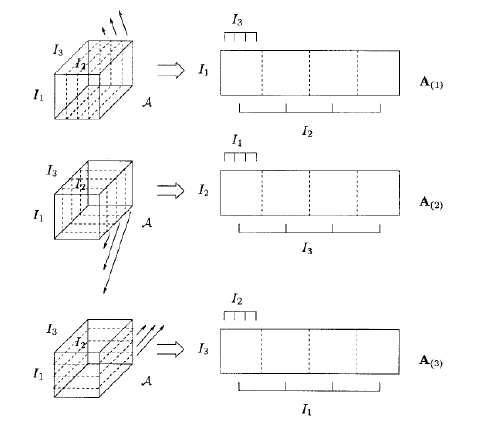

In [13]:
from IPython.display import Image
Image(filename='/Unfolding-of-third-order-of-a-tensor.png')

In [14]:
def unfold(X, mode):
    return np.reshape(np.moveaxis(X, mode-1,0),(X.shape[mode-1],-1))

def fold(X, mode, shape):
    new_shape = list(shape)
    mode_dim = new_shape.pop(mode-1)
    new_shape.insert(0, mode_dim)
    return np.moveaxis(np.reshape(X, new_shape), 0, mode-1)

In [15]:
unfold(data,mode=1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [16]:
unfold(data,mode=2)

array([[ 0,  1,  2, 12, 13, 14, 24, 25, 26],
       [ 3,  4,  5, 15, 16, 17, 27, 28, 29],
       [ 6,  7,  8, 18, 19, 20, 30, 31, 32],
       [ 9, 10, 11, 21, 22, 23, 33, 34, 35]])

In [17]:
unfold(data,mode=3)

array([[ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33],
       [ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34],
       [ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35]])

In [18]:
unfold_tensor = unfold(data,mode=0)
fold(unfold_tensor, mode=0, shape=data.shape)

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]]])

## Тензорное разложение
Теперь распространим идею матричной факторизации на тензоры. В следующей части мы изучим метода тензорной факторизации RESCAL. Далее мы увидим, как использовать его с набором данных RDF для прогнозирования связей.
В целях экспериментов мы будем использовать набор данных родства (alyawarra).

Набор данных alyawarra, используемый в этом упражнении, содержит 26 отношений (брат, сестра, отец и т. д.) между 104 людьми. Используя тензорную факторизацию, мы будем прогнозировать недостающие отношения и оценивать производительность, используя площадь под кривой.

## Задание 3
## Rescal Decomposition

Факторизация RESCAL соответствует разложению Tucker2 с ограничением, согласно которому две факторные матрицы должны быть идентичными.

$ \mathbf{T = R \times_1 A \times_2 A} + \epsilon$

$ \mathbf{T_{:,:,k} = A R_{:,:,k} A^T} + \epsilon$

где $\textbf{A}\in \mathbb{R}^{|V|\times r} $ представляет пространство скрытых компонентов. $\textbf{R}_{:,:,k}\in \mathbb{R}^{r\times r} $ — асимметричная матрица, задающая взаимодействие скрытых компонентов k-го отношения. $Y_f$ — аппроксимированный тензор, а $\epsilon$ — оценка шума.

Чтобы аппроксимировать приведенную выше факторизацию, мы определим потери, минимизирующие норму Фробениуса:

$L = argmin_{A,R} \sum_k||T-A R_{:,:,k} A^T||^2 $

Чтобы решить вышеуказанную функцию потерь, мы снова будем использовать метод попеременных наименьших квадратов.


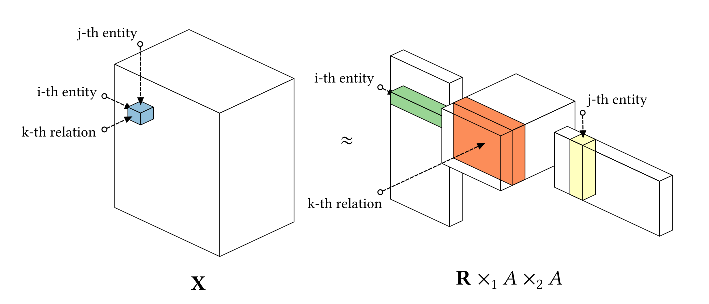

In [20]:
from IPython.display import Image
Image(filename='/rescal.png')


In [21]:

!pip install rescal

In [1]:
!pip install "numpy<1.24"

In [4]:
import numpy as np
from numpy.linalg import norm
from numpy.random import shuffle
from scipy.sparse import lil_matrix
from scipy.io.matlab import loadmat
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from rescal import rescal_als
from scipy.sparse import csr_matrix

def normalize_predictions(P, nm_entities, nm_relations):
    for a in range(nm_entities):
        for b in range(nm_entities):
            nrm = norm(P[a, b, :nm_relations])
            if nrm != 0:
                # округленные значения для более быстрого расчета AUC-PR
                P[a, b, :nm_relations] = np.round_(P[a, b, :nm_relations] / nrm, decimals=3)
    return P

def rescal_fact(train_tensor, n_dim, nm_entities, nm_relations):
    entity_embedding, R, _, _, _ = rescal_als(train_tensor, n_dim, init='nvecs', conv=1e-3,lambda_A=10, lambda_R=10)
    n = entity_embedding.shape[0]
    reconstructed_tensor = np.zeros((n, n, len(R)))
    for k in range(len(R)):
        reconstructed_tensor[:, :, k] = np.dot(entity_embedding, np.dot(R[k], entity_embedding.T))
    reconstructed_tensor = normalize_predictions(reconstructed_tensor, nm_entities, nm_relations)

    return entity_embedding, reconstructed_tensor

def load_data(filename, train_fraction=0.7):
    mat = loadmat(filename)
    K = np.array(mat['Rs'], float)
    nm_entities, nm_relations = K.shape[0], K.shape[2]
    # построить массив для rescal
    T = [lil_matrix(K[:, :, i]) for i in range(nm_relations)]
    # Train Test Split
    triples = nm_entities * nm_entities * nm_relations
    IDX = list(range(triples))
    shuffle(IDX)
    train = int(train_fraction*len(IDX))
    idx_test = IDX[train:]

    train_tensor = [Ti.copy() for Ti in T]
    mask_idx = np.unravel_index(idx_test, (nm_entities, nm_entities, nm_relations))
    # установить значения, которые будут предсказаны, равными нулю
    for i in range(len(mask_idx[0])):
        train_tensor[mask_idx[2][i]][mask_idx[0][i], mask_idx[1][i]] = 0
    return K, train_tensor, mask_idx, nm_entities, nm_relations

n_dim = 100
filename='/alyawarradata.mat'
K, train_tensor, target_idx, nm_entities, nm_relations = load_data(filename, train_fraction=0.7)
# Train Rescal
entity_embedding, reconstructed_tensor = rescal_fact(train_tensor, n_dim, nm_entities, nm_relations)

print('AUC\n{}'.format(roc_auc_score(K[target_idx], reconstructed_tensor[target_idx])))

AUC
0.9859869029201397


## Rescal Entity Embedding Visualization

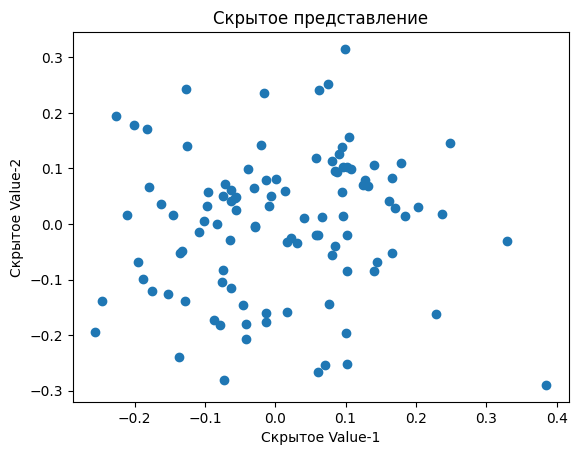

In [5]:
import matplotlib.pyplot as plt
plt.scatter(entity_embedding[:,0],entity_embedding[:,1])
plt.xlabel('Скрытое Value-1')
plt.ylabel('Скрытое Value-2')
plt.title('Скрытое представление')
plt.show()

## Задание 4
В последней части мы использовали RESCAL для поиска скрытого представления сущностей в графе знаний. Для RESCAL нам необходимо указать определенные параметры. В этом упражнении мы настроим эти параметры для достижения оптимальной производительности. Мы разделим набор данных на три части: обучение, проверка и тестирование. Сначала мы находим скрытое представление с помощью обучающего набора, затем используем скрытые функции для вычисления производительности на проверочном наборе. Наконец, мы выбираем параметры с оптимальной производительностью на проверочном наборе и сообщаем о производительности на тестовом наборе.


In [7]:
import itertools

def load_train_val_test(filename, train_fraction=0.6, val_fraction=0.2):
    mat = loadmat(filename)
    K = np.array(mat['Rs'], np.float32)
    nm_entities, nm_relations = K.shape[0], K.shape[2]
    # построить массив для for rescal
    T = [lil_matrix(K[:, :, i]) for i in range(nm_relations)]
    # Train Test Split
    triples = nm_entities * nm_entities * nm_relations
    IDX = list(range(triples))
    shuffle(IDX)
    train = int(train_fraction*len(IDX))
    val = int(val_fraction*len(IDX))
    idx_val = IDX[train:train+val]
    idx_test = IDX[train+val:]
    train_tensor = [Ti.copy() for Ti in T]
    mask_idx = np.unravel_index(idx_test+idx_val, (nm_entities, nm_entities, nm_relations))
    val_idx = np.unravel_index(idx_val, (nm_entities, nm_entities, nm_relations))
    test_idx = np.unravel_index(idx_test, (nm_entities, nm_entities, nm_relations))
    # установить значения, которые будут предсказаны, равными нулю
    for i in range(len(mask_idx[0])):
        train_tensor[mask_idx[2][i]][mask_idx[0][i], mask_idx[1][i]] = 0
    return K, train_tensor, val_idx, test_idx

n_dim = 10
filename='/alyawarradata.mat'
# Mask Test and Validation Triples
K, train_tensor, val_idx, test_idx = load_train_val_test(filename, train_fraction=0.6, val_fraction=0.2)
var_list = [0.001, 0.1, 1., 10., 100.]
best_roc = 0
# Обучение на обучающем наборе и оценка на проверочном наборе
for (var_x, var_e, var_r) in itertools.product(var_list, repeat=3):
    A, R, f, itr, exectimes = rescal_als(train_tensor, n_dim, lambda_A=var_x, lambda_R=var_e, lambda_V=var_r)
    n = A.shape[0]
    reconstructed_tensor = np.zeros((n, n, len(R)))
    for k in range(len(R)):
        reconstructed_tensor[:, :, k] = np.dot(A, np.dot(R[k], A.T))
    reconstructed_tensor = normalize_predictions(reconstructed_tensor, nm_entities, nm_relations)
    score = roc_auc_score(K[val_idx], reconstructed_tensor[val_idx])

    print('var_x:{0:3.3f}, var_e:{1:3.3f}, var_r:{2:3.3f}, AUC-ROC:{3:.3f}'.format(var_x, var_e, var_r, score))
    if score > best_roc:
        best_vars = (var_x, var_e, var_r)
        best_roc = score

lambda_a, lambda_r, lambda_v = best_vars
print(best_vars, best_roc)
# Используйте оптимальные параметры в проверочном наборе и тестируйте в контрольном наборе.
lambda_a, lambda_r, lambda_v = best_vars
A, R, f, itr, exectimes = rescal_als(train_tensor, n_dim, lambda_A=var_x, lambda_R=var_e, lambda_V=var_r)
n = A.shape[0]
reconstructed_tensor = np.zeros((n, n, len(R)))
for k in range(len(R)):
    reconstructed_tensor[:, :, k] = np.dot(A, np.dot(R[k], A.T))
reconstructed_tensor = normalize_predictions(reconstructed_tensor, nm_entities, nm_relations)
score = roc_auc_score(K[test_idx], reconstructed_tensor[test_idx])
print('AUC On Test Set with Optimum Parameters\n{}'.format(score))

var_x:0.001, var_e:0.001, var_r:0.001, AUC-ROC:0.965
var_x:0.001, var_e:0.001, var_r:0.100, AUC-ROC:0.965
var_x:0.001, var_e:0.001, var_r:1.000, AUC-ROC:0.965
var_x:0.001, var_e:0.001, var_r:10.000, AUC-ROC:0.965
var_x:0.001, var_e:0.001, var_r:100.000, AUC-ROC:0.965
var_x:0.001, var_e:0.100, var_r:0.001, AUC-ROC:0.965
var_x:0.001, var_e:0.100, var_r:0.100, AUC-ROC:0.965
var_x:0.001, var_e:0.100, var_r:1.000, AUC-ROC:0.965
var_x:0.001, var_e:0.100, var_r:10.000, AUC-ROC:0.965
var_x:0.001, var_e:0.100, var_r:100.000, AUC-ROC:0.965
var_x:0.001, var_e:1.000, var_r:0.001, AUC-ROC:0.965
var_x:0.001, var_e:1.000, var_r:0.100, AUC-ROC:0.965
var_x:0.001, var_e:1.000, var_r:1.000, AUC-ROC:0.965
var_x:0.001, var_e:1.000, var_r:10.000, AUC-ROC:0.965
var_x:0.001, var_e:1.000, var_r:100.000, AUC-ROC:0.965
var_x:0.001, var_e:10.000, var_r:0.001, AUC-ROC:0.965
var_x:0.001, var_e:10.000, var_r:0.100, AUC-ROC:0.965
var_x:0.001, var_e:10.000, var_r:1.000, AUC-ROC:0.965
var_x:0.001, var_e:10.000, var_r:1

## Ссылки
1) https://github.com/mnick/scikit-tensor

2) https://github.com/mnick/rescal.py

3) http://www.bsp.brain.riken.jp/~zhougx/tensor.html

4) https://edoc.ub.uni-muenchen.de/16056/1/Nickel_Maximilian.pdf

5) http://epubs.siam.org/doi/abs/10.1137/S0895479896305696